## Lasso regression for sparse data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import class_FM as FM
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from itertools import combinations

### Initialize factorial model and sample dataset for k=3

In [239]:
n = 1000
k = 3
degree = 3
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)


### Fit Lasso regression with cross validation for alpha

In [240]:
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.4637748   0.          0.00316042 -0.86222917 -0.00868506
  0.03107935 -0.11330512]
Mean Squared Error of y: 0.010163565628389128
Mean Squared Error of beta: 0.00020646901975851506


### Compute expected outcomes as linear combinations of betas

In [241]:
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.46  0.    0.   -1.33 -0.47  0.03 -1.41]


### Cluster treatment combinations by expected outcomes

In [242]:
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0]; score: -2.54
Max clusters: 2; cluster labels: [1 1 1 1 0 1 1 0]; score: -0.31
Max clusters: 3; cluster labels: [1 2 1 1 0 2 1 0]; score: -0.00
Max clusters: 4; cluster labels: [1 2 1 1 0 2 1 3]; score: -0.00
Max clusters: 5; cluster labels: [1 2 1 1 0 2 4 3]; score: -0.00
Max clusters: 6; cluster labels: [1 5 1 1 0 2 4 3]; score: -0.00
Max clusters: 7; cluster labels: [6 5 6 1 0 2 4 3]; score: -0.00


### Plot betas and expected outcomes

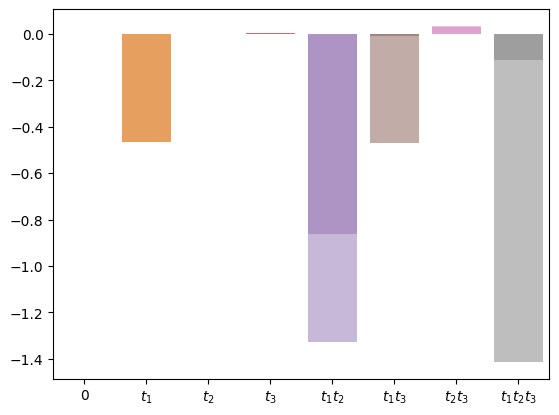

In [243]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=4

In [244]:
n = 1000
k = 4
degree = 4
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [245]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.543451    0.3862214   0.4831172   0.         -0.01750211
  0.06066966 -0.15994355  0.00780474  0.01052252  0.01000153 -0.
 -0.01050108 -0.          0.18682475 -0.41272694]
Mean Squared Error of y: 0.009933492641711969
Mean Squared Error of beta: 0.0003990872937720269


In [246]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.54  0.39  0.48  0.   -0.17  0.   -0.7   0.88  0.4   0.49  0.38
 -0.33 -0.15  1.08  0.  ]


In [247]:
print(betas.shape, expected_outcomes.shape)

(16,) (16,)


In [248]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -3.53
Max clusters: 2; cluster labels: [0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0]; score: -1.02
Max clusters: 3; cluster labels: [2 0 1 1 2 2 2 0 1 1 1 1 0 2 1 2]; score: -0.58
Max clusters: 4; cluster labels: [3 0 1 1 3 3 3 0 2 1 1 1 0 3 2 3]; score: -0.14
Max clusters: 5; cluster labels: [3 4 1 1 3 0 3 4 2 1 1 1 0 0 2 3]; score: -0.07
Max clusters: 6; cluster labels: [0 3 2 2 0 4 0 3 5 2 2 2 4 4 1 0]; score: -0.05
Max clusters: 7; cluster labels: [3 4 1 1 3 5 3 4 6 1 1 1 0 5 2 3]; score: -0.03
Max clusters: 8; cluster labels: [4 6 2 2 4 1 4 3 0 2 2 2 7 1 5 4]; score: -0.01
Max clusters: 9; cluster labels: [2 8 7 1 2 5 2 4 3 7 1 7 0 5 6 2]; score: -0.00
Max clusters: 10; cluster labels: [2 8 7 1 2 5 2 4 3 7 1 7 0 9 6 2]; score: -0.00
Max clusters: 11; cluster labels: [ 2  8  7  1  2  5  2  4  3 10  1  7  0  9  6  2]; score: -0.00
Max clusters: 12; cluster labels: [ 2  8  7 11  2  5  2  4  3 10  1  7  0  9  6  2]; score:

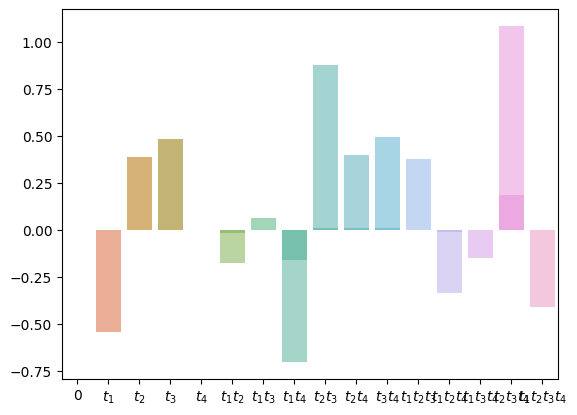

In [249]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=5

In [250]:
n = 1000
k = 5
degree = 5
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [251]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.00615014  0.36288005  0.          0.00563909  0.00419086
  0.00781563 -0.0254381   0.          0.          0.03989441  0.0122317
 -0.          0.          0.17361246 -0.43732393  0.19791085  0.
  0.08772841 -0.         -0.          0.          0.5031516  -0.
 -0.1523685  -0.15900049 -0.          0.          0.         -0.02823868
 -0.         -0.        ]
Mean Squared Error of y: 0.010939823856963767
Mean Squared Error of beta: 0.005701355170458555


In [252]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.01  0.36  0.    0.01  0.    0.36 -0.03 -0.   -0.    0.4   0.38
  0.37  0.01  0.18 -0.43  0.58  0.38  0.46 -0.03  0.15 -0.43  0.92  0.58
 -0.2  -0.41  1.1   0.84 -0.12 -0.47  0.35  0.59]


In [253]:
print(betas.shape, expected_outcomes.shape)

(32,) (32,)


In [254]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -4.76
Max clusters: 2; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]; score: -1.45
Max clusters: 3; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 0]; score: -0.80
Max clusters: 4; cluster labels: [1 1 3 1 1 1 3 1 1 1 3 3 3 1 1 0 3 3 3 1 1 0 2 3 0 0 2 2 1 0 3 3]; score: -0.24
Max clusters: 5; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 3 4 0 0 1 1 3 2 4 1 3 2 2 1 3 0 4]; score: -0.15
Max clusters: 6; cluster labels: [4 4 5 4 4 4 5 4 4 4 5 5 5 4 0 2 3 5 5 4 0 2 1 3 4 2 1 1 4 2 5 3]; score: -0.09
Max clusters: 7; cluster labels: [2 2 0 2 2 2 0 2 2 2 0 0 0 2 5 1 4 0 0 2 5 1 3 4 6 1 3 3 6 1 0 4]; score: -0.05
Max clusters: 8; cluster labels: [5 5 0 5 5 5 0 5 5 5 0 0 0 5 6 3 4 0 0 5 6 3 2 4 1 3 7 2 1 3 0 4]; score: -0.02
Max clusters: 9; cluster labels: [4 4 1 4 4 4 1 4 4 4 1 1 1 4 6 3 5 1 8 4 6 3 2 5 0 3 7 2 0 3 1 

/tmp/ipykernel_141/426641171.py:3: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))


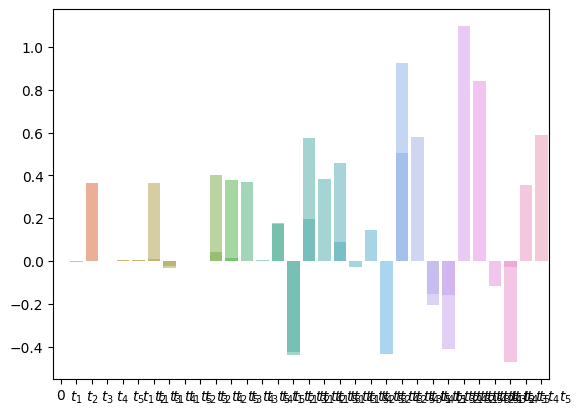

In [255]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Generate data for m less than sp

In [678]:
#s = sparsity * len(beta)
#if k is 10: 88
# so error low if 88 * log(176) >= 197
from sklearn.metrics import zero_one_loss
def run_generation(n_max, k, sparsity, step):
    mse_dict = {}
    for n in range(20, n_max, step):
        mse_sum = 0
        mse_beta_sum=0
        for seed in [0,1,2,30,4]:
            #dictionary for mse's

            degree = k
            sigma = .1

            fm = FM.FactorialModel(
                n=n,
                k=k,
                degree=degree,
                sigma=sigma,
                sparsity=sparsity,
                beta_seed=seed,
            )
            t, y = fm.sample(seed=seed, contrast_coding = True)


            pf = preprocessing.PolynomialFeatures(
            degree=degree, interaction_only=True, include_bias=True,
            )
            T = pf.fit_transform(t)
            T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.1, random_state=seed)
#             alpha_cv = [0.001, 0.01, 0.1, 0.5]
#             model = LassoCV(alphas=alpha_cv, cv=5, random_state=42, max_iter=10000)
            model = Lasso(alpha = 0.05, max_iter = 10000)
            model.fit(T_train, y_train)
            # print(f'alpha={model.alpha_}\nbetas={model.coef_}')

            y_pred = model.predict(T_test)
            mse_sum += mean_squared_error(y_test, y_pred)
            # print(f"Mean Squared Error of y: {mse}")

            beta_actual = fm.beta
            beta_hat = model.coef_
#             beta_hat[beta_hat!=0] = 1
#             beta_actual[beta_actual!=0] = 1
            mse_beta_sum += np.linalg.norm(beta_actual - beta_hat)
            # print(f"Mean Squared Error of beta: {mse_beta}")
#             print(zero_one_loss(beta_actual, beta_hat))

        mse_dict[n] = (mse_sum/5, mse_beta_sum/5)
    return mse_dict, len(fm.beta)

In [679]:
def draw_charts(mse_dict, sparsity, length, k):
    n = list(mse_dict.keys())
    mse, mse_beta = zip(*mse_dict.values())

    fig, ax1 = plt.subplots()

    # Plot the first line (mse) on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('m')
    ax1.set_ylabel('mse', color=color)
    ax1.plot(n, mse, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 3.5)
#     Create a second y-axis for the second line (mse_beta)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Dif in Beta norm', color=color)
    ax2.plot(n, mse_beta, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,2)
    tipping_point = calc_tipping_point(sparsity, length, k)  
    ax1.axvline(x=tipping_point, linestyle='--', color='gray')
    fig.tight_layout()  # For layout
    plt.title('MSE and Beta Norm Dif vs m')
    plt.show()

In [680]:
def calc_tipping_point(sparsity, length, k):
    return np.log(math.e /(1-sparsity)) *(1-sparsity) * length

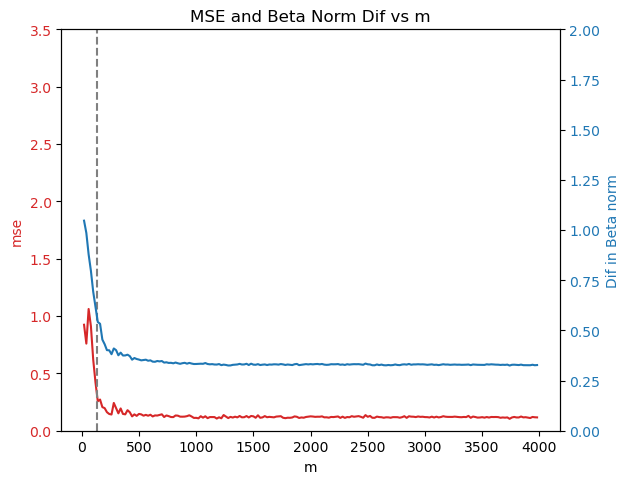

133.60322111662592
{20: (0.9244047463432861, 1.0470203161239624), 40: (0.7599821736096868, 0.9856424450874328), 60: (1.0619537224880604, 0.8788659930229187), 80: (0.91180446063336, 0.7968980312347412), 100: (0.6206912158604858, 0.6930110812187195), 120: (0.4211478860025199, 0.6189194798469544), 140: (0.2570176979972253, 0.5420073807239533), 160: (0.27176640455537027, 0.5330185830593109), 180: (0.20593764802373768, 0.45429099202156065), 200: (0.1970632741421756, 0.43130925893783567), 220: (0.16183265363471863, 0.40168399214744566), 240: (0.1460707112222336, 0.4008058965206146), 260: (0.1414408859981342, 0.3814556062221527), 280: (0.24232811606425755, 0.41009439826011657), 300: (0.19586076501130292, 0.4015755534172058), 320: (0.15171901018769496, 0.3761152923107147), 340: (0.19431818098388662, 0.3892629981040955), 360: (0.14659754129253072, 0.3748964607715607), 380: (0.14279205307616374, 0.37520371079444886), 400: (0.17921315703010082, 0.37908156514167785), 420: (0.16087618665040376, 0.3

In [681]:
n_max = 4000
k = 8
sparsity = 0.8
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict, sparsity, length, k)
print(calc_tipping_point(sparsity, length, k))
print(mse_dict)

# Compare forward

In [214]:
print(fm.beta)

[ 0.          0.42008284  0.48750722  0.11071539  0.1445329   0.
 -0.3190283  -0.31422603 -0.3484527   0.         -0.01964589  0.
  0.         -0.3796484   0.         -0.2937078 ]


In [628]:

def add_interaction_terms(df, kept_features, all_features, max_degree):
    base_df = df[kept_features].copy()
    feature_dict = {}
    # Generate combinations that include at least one kept feature
    for degree in range(2, max_degree + 1):
        combo_list = []
        # Include combinations with at least one kept feature
        valid_combos = [combo for k in range(1, degree) for combo in combinations(all_features, degree) if len(set(combo) & set(kept_features)) > 0]
        for combo in valid_combos:
            interaction_term = ' * '.join(str(item) for item in combo)
            base_df[interaction_term] = df[list(combo)].prod(axis=1)
            if len(combo) == degree:
#                 print(f'interaction{interaction_term}')
                combo_list.append(interaction_term)

#             print(base_df.columns)
        feature_dict[degree] = list(set(combo_list))

    return base_df, feature_dict

def forward_selection(X, y, p_value, degree):
    kept_features = []
    # total_features = X.columns.tolist()
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
#     print(model.summary())
#     print(model.pvalues)
    kept_features= [X.columns[i] for i in range(1, len(X.columns)-1) if model.pvalues[i] < p_value]
#     print(kept_features)
    all_features = X.columns[1:] 
    
    interaction_df, feature_dict = add_interaction_terms(X, kept_features, all_features, degree)
    interaction_df = sm.add_constant(interaction_df)
    if len(kept_features)== 0:
        return 0, 0
    for i in range(2,degree+1):
        test_features = kept_features + feature_dict[i]
        test_df = interaction_df[test_features]
        
        model = sm.OLS(y, test_df).fit()
#         print(model.pvalues)
        kept_features = [column for column in test_df.columns if model.pvalues[column] < 0.05]
    #update model
    test_df = interaction_df[kept_features]
    if test_df.shape[1] == 0:
        return None, None
    print(test_df)
    model = sm.OLS(y,test_df).fit()
#     print(kept_features)
    print(f'kept{kept_features}')
    return model, kept_features


In [646]:

def run_multiple(k, n, seed):
    fm = FM.FactorialModel(
        n=n,
        k=k,
        degree=k,
        sigma=0.1,
        sparsity=0.8,
        beta_seed=seed,
        antiheredity=True
    )
    t, y = fm.sample(seed=seed, contrast_coding = True)

    #forward
    T_train, T_test, y_train, y_test = train_test_split(t, y, test_size=0.1, random_state=seed)
    T_train = pd.DataFrame(T_train)
    y_train = pd.DataFrame(y_train)
    T_test = pd.DataFrame(T_test)
    y_test = pd.DataFrame(y_test)
    model, features = forward_selection(T_train, y_train, 0.05, k)
#     print(features)
    if model == 0 or model is None:
        print("none")
        mse_for = 0
    else:
#         for item, name in zip(model.params, features):
#             print(name, item)
        T_test = sm.add_constant(T_test)
        kept_features = T_test.columns[:]
        all_features =  T_test.columns[1:]  
        T_test, feature_dict = add_interaction_terms(T_test, kept_features, all_features, k)
        # print(T_test.columns)
#         print(feature_dict)
#         print(f'features {features}')
        T_test = T_test[features]
#         print(T_test.columns)
#         print(f'parameters {model.params}')
        
        y_pred = model.predict(T_test)
        mse_for = mean_squared_error(y_pred,y_test)
    
    #lasso
    pf = preprocessing.PolynomialFeatures(
    degree=k, interaction_only=True, include_bias=True,
    )
    T = pf.fit_transform(t)
    T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.1, random_state=seed)


    alpha_cv = [0.001, 0.01, 0.1, 0.5]
    modellasso = Lasso(alpha=0.01, max_iter=10000)
    modellasso.fit(T_train, y_train)
#     T_test.columns = [str(col) for col in T_test.columns]
    y_pred = modellasso.predict(T_test)
    mse_lasso = mean_squared_error(y_pred, y_test)

    return model, modellasso, fm.beta, mse_for, mse_lasso

In [647]:
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import zero_one_loss
#     print(model_forward.params[0])
    # Assume maximum number of features
def get_map(k):
    max_features = k

    # Generate all possible combinations of features and interactions
    all_combinations = []
    for r in range(1, max_features + 1):
        all_combinations.extend(combinations(range(max_features), r))

    # Create mapping of feature combinations to indices
    index_map = {' * '.join(map(str, comb)): idx+1 for idx, comb in enumerate(all_combinations)}
    return index_map
def reorder_coef(index_map, model,k):
    polynomial_array = np.zeros((2**k))
    terms = [str(term) for term in model.params.index]
    coefficients = [coef for coef in model.params]
    # Assign coefficients to their mapped indices
    for term, coeff in zip(terms, coefficients):
        index = index_map[term]
        polynomial_array[index] = coeff
    return polynomial_array

k = 12
mse_y_for = 0
mse_y_lasso_sum=0
mse_forward_sum = 0
mse_lasso_sum = 0
zo_forward_sum=0
zo_lasso_sum = 0
miss_count = 0
for seed in [0,1,2,3,4]:
    model_forward, model_lasso, beta, mse_y_forward, mse_y_lasso = run_multiple(k,3000, seed)
    index_map = get_map(k)
    mse_lasso_sum += np.linalg.norm(model_lasso.coef_ - beta)
    print(model_forward)
    if model_forward !=0:
        pass
        forward_coef = reorder_coef(index_map, model_forward,k)
        mse_forward_sum += np.linalg.norm(forward_coef- beta)
        beta[beta!=0] = 1
        forward_coef[forward_coef!=0] = 1
        zo_forward_sum += zero_one_loss(forward_coef, beta)
    else:
        miss_count +=1
    
    lasso_beta = model_lasso.coef_
    lasso_beta[lasso_beta!=0] = 1
    beta[beta!=0] = 1
    zo_lasso_sum += zero_one_loss(lasso_beta, beta)
    print(zero_one_loss(lasso_beta, beta))
    mse_y_for += mse_y_forward
    mse_y_lasso_sum += mse_y_lasso
print(miss_count)
print(f'mse forward: {mse_forward_sum/(5)}\n mse lasso: {mse_lasso_sum/5}\n 01 forward: {zo_forward_sum/(5)}\n 01 lasso: {zo_lasso_sum/5}')
print(mse_y_for/(5))
print(mse_y_lasso_sum/5)
    


none
0
0.128662109375
      0 * 9 * 11  0 * 4 * 6 * 9  0 * 1 * 6 * 11  0 * 2 * 7 * 11  \
0            1.0            1.0             1.0            -1.0   
1            1.0           -1.0            -1.0            -1.0   
2           -1.0            1.0            -1.0             1.0   
3           -1.0            1.0             1.0            -1.0   
4            1.0           -1.0             1.0            -1.0   
...          ...            ...             ...             ...   
2695         1.0            1.0            -1.0            -1.0   
2696         1.0            1.0             1.0             1.0   
2697        -1.0           -1.0             1.0             1.0   
2698        -1.0            1.0            -1.0            -1.0   
2699         1.0           -1.0            -1.0            -1.0   

      0 * 1 * 3 * 7  0 * 1 * 4 * 11  0 * 2 * 3 * 8  0 * 4 * 6 * 7  \
0               1.0            -1.0           -1.0           -1.0   
1               1.0            -1.0

kept['0 * 9 * 11', '0 * 4 * 6 * 9', '0 * 1 * 6 * 11', '0 * 2 * 7 * 11', '0 * 1 * 3 * 7', '0 * 1 * 4 * 11', '0 * 2 * 3 * 8', '0 * 4 * 6 * 7', '0 * 2 * 5 * 7 * 10', '0 * 2 * 3 * 5 * 10', '0 * 2 * 3 * 7 * 11', '0 * 3 * 5 * 9 * 11', '0 * 3 * 8 * 9 * 10', '0 * 3 * 4 * 8 * 9', '0 * 1 * 6 * 7 * 11', '0 * 4 * 8 * 10 * 11', '0 * 2 * 3 * 4 * 9', '0 * 4 * 8 * 9 * 10', '0 * 2 * 5 * 6 * 9', '0 * 2 * 6 * 7 * 8', '0 * 5 * 7 * 9 * 10', '0 * 1 * 4 * 5 * 6', '0 * 1 * 2 * 9 * 10', '0 * 2 * 4 * 8 * 9', '0 * 1 * 3 * 4 * 5 * 10', '0 * 1 * 2 * 3 * 10 * 11', '0 * 2 * 6 * 8 * 10 * 11', '0 * 1 * 2 * 4 * 6 * 11', '0 * 3 * 5 * 7 * 8 * 10', '0 * 2 * 4 * 6 * 7 * 8', '0 * 1 * 3 * 7 * 8 * 9', '0 * 1 * 3 * 5 * 8 * 10', '0 * 1 * 5 * 7 * 9 * 10', '0 * 1 * 4 * 5 * 7 * 10', '0 * 2 * 5 * 8 * 9 * 11', '0 * 3 * 6 * 7 * 8 * 9', '0 * 1 * 4 * 5 * 6 * 8', '0 * 4 * 5 * 8 * 10 * 11', '0 * 3 * 4 * 6 * 7 * 9', '0 * 1 * 2 * 4 * 5 * 10', '0 * 1 * 2 * 6 * 7 * 11', '0 * 4 * 5 * 8 * 9 * 10', '0 * 2 * 3 * 4 * 6 * 7', '0 * 1 * 2 * 4 * 8 * 

In [356]:
#generate ddict


In [340]:


print(polynomial_array)

[ 0.         -0.1587853  -0.14058747 -0.74944532  0.          0.
  0.          0.24844027  0.07426817  0.          0.          0.
  0.         -0.22648627  0.0899207   0.        ]


# archive


In [ ]:
# def interactions(X, y, p_value, original_features, sig_features, kept_features, i):
    
#     combo_features = []
#     if i == 0:
#         for feature1, feature2 in combinations(original_features,2):
#             # print(feature1, feature2)
#             X[f"{feature1}*{feature2}"] = X[feature1] * X[feature2]
#             combo_features.append(f"{feature1}*{feature2}")
#     else:
#         for feature1 in original_features:
#             for feature2 in kept_features:
#                 if str(feature1) in str(feature2):
#                     continue
#                 else:
#                     X[f"{feature1},{feature2}"] = X[feature1] * X[feature2]
#     kept_features = []
#     # print(y)
#     while True:
#         remaining_features = list(set(combo_features) - set(kept_features))

#         new_pval = pd.Series(index=remaining_features)
        
#         for new_column in remaining_features:
#             # print(X[kept_features + [new_column]])
#             test_columns = list(set(sig_features) | set([new_column]) | set(kept_features))
#             model = sm.OLS(y, sm.add_constant(X[test_columns])).fit(disp=0)
#             new_pval[new_column] = model.pvalues[new_column]
        
#         min_p_value = new_pval.min()
#         if min_p_value < p_value:
#             kept_features.append(new_pval.idxmin())
#         else:
#             break
#     return kept_features

In [ ]:
def forward_selection(X, y, p_value):
    kept_features = []
    total_features = X.columns.tolist()


    while True:
        remaining_features = list(set(total_features) - set(kept_features))

        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            # print(X[kept_features + [new_column]])
            test_columns = list(set([new_column]) | set(kept_features))
            model = sm.OLS(y, sm.add_constant(X[test_columns])).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < p_value:
            kept_features.append(new_pval.idxmin())
        else:
            break
    return kept_features
def interactions(X, y, p_value, original_features, sig_features, kept_features, i):
    
    combo_features = []
    if i == 0:
        for feature1, feature2 in combinations(original_features,2):
            # print(feature1, feature2)
            X[f"{feature1}*{feature2}"] = X[feature1] * X[feature2]
            combo_features.append(f"{feature1}*{feature2}")
    else:
        for feature1 in original_features:
            for feature2 in kept_features:
                if str(feature1) in str(feature2):
                    continue
                else:
                    X[f"{feature1},{feature2}"] = X[feature1] * X[feature2]
    kept_features = []
    # print(y)
    while True:
        remaining_features = list(set(combo_features) - set(kept_features))

        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            # print(X[kept_features + [new_column]])
            test_columns = list(set(sig_features) | set([new_column]) | set(kept_features))
            model = sm.OLS(y, sm.add_constant(X[test_columns])).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < p_value:
            kept_features.append(new_pval.idxmin())
        else:
            break
    return kept_features

In [185]:
k=2
fm = FM.FactorialModel(
    n=120,
    k=k,
    degree=k,
    sigma=0.1,
    sparsity=0.5,
    beta_seed=1,
    antiheredity=False
)
t, y = fm.sample(seed=0, contrast_coding = True)


In [186]:
t_train, t_test, y_train, y_test = train_test_split(t, y, test_size=0.01, random_state=40)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=40, max_iter=10000)
model.fit(t_train, y_train)
# print(f'alpha={model.alpha_}\nbetas={model.coef_}')
y_pred = model.predict(t_test)
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error of y: {mse}")
beta_actual = fm.beta
beta_hat = model.coef_
# beta_hat[beta_hat != 0] = 1
# beta_actual[beta_actual != 0] = 1
# mse_beta= zero_one_loss(beta_actual, beta_hat)
print(beta_actual)

[ 0.          0.          0.24578804 -0.96932364]


In [187]:
#forward selection
T_train, T_test, y_train, y_test = train_test_split(t, y, test_size=0.01, random_state=40)
T_train = pd.DataFrame(T_train)
y_train = pd.DataFrame(y_train)
kept_features = forward_selection(T_train, y_train, 0.05)
print(kept_features)

original_features = kept_features
for i in range(k):
    int_features = interactions(T_train, y_train, 0.05, original_features, kept_features, i)
    print(int_features)
    if len(int_features) > 0:
        original_features.extend(int_features)
print(original_features)
model = sm.OLS(y_train, sm.add_constant(T_train[original_features])).fit(disp=0)
print(model.params)


TypeError: forward_selection() missing 1 required positional argument: 'degree'

In [188]:
#lasso
pf = preprocessing.PolynomialFeatures(
degree=k, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)

t_train, t_test, y_train, y_test = train_test_split(T, y, test_size=0.01, random_state=40)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = Lasso(alpha=0.03, max_iter=10000)
model.fit(t_train, y_train)
print(model.coef_)

[ 0.        -0.         0.2049138 -0.9379139]


In [189]:
model_beta = model.coef_
model_beta[model_beta!=0] = 1
beta_real = beta_actual
beta_real[beta_real!=0] =1
print(zero_one_loss(beta_real,model_beta))


NameError: name 'zero_one_loss' is not defined